In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/Nishant1201/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()

# Max Q during a Rocket Launch

## E&ICT Academy, IIT Guwahati

In [2]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

### Earth Atmosphere Model

In [3]:
def compute_density(height):
    """
    Returns the air density (kg/m^3) depending on altitude
    based on the equations taken from,
    
    https://www.grc.nasa.gov/www/k-12/rocket/atmosmet.html
    
    Input :
    --------
    height : altitude in km
             float
    
    Return :
    --------
    rho : denisty in kg/m^3
          float
    """
    
    if height < 11000:
        T = 15.04 - 0.00649 * height
        p = 101.29 * ((T + 273.1)/288.08)**5.256
    elif 11000 <= height < 25000:
        T = -56.46
        p = 22.65 * np.exp(1.73 - .000157 * height)
    else:
        T = -131.21 + 0.00299 * height
        p = 2.488 * ((T + 273.1)/ 216.6)**-11.388
    
    rho = p / (0.2869 * (T + 273.1))
    
    return rho

In [4]:
def compute_velocity(u, acceleration, time):
    """
    Returns velocity at a given time using the following equation,
    v = u + a*t
    where,
    v : velocity at time t
    u : initial velocity
    a : acceleration (assumed constant)
    
    Input :
    ---------
    u : Initial velocity (metres/second)
        float
    acceleration : acceleration (metres/second^2)
                   float
    time : time (in seconds)
            float
            
    Return :
    ---------
    v : Velocity (m/s) at time t
        float
    """
    
    return u + acceleration*time

In [5]:
def compute_altitude(u, acceleration, time):
    """
    Computes altitude at a given time using the following equation,
    y = u*t + 0.5*a*t^2
    where,
    u : initial velocity (metres/second)
    a : acceleration (m/s^2 assumed constant)
    t : time (seconds)
    
    Input :
    ---------
    u : Initial velocity (metres/second)
        float
    acceleration : acceleration (metres/second^2)
                   float
    time : time (in seconds)
            float
            
    Return :
    ---------
    y : Altitude (in metres) at time t
        float
    """
    
    return u*t + 0.5*acceleration*time**2.0

**Estimating MaxQ during a rocket launch**

In [6]:
dynamic_pressure = []
time = np.arange(0.0,510.0,1.0)

In [7]:
for t in time:
    """
    Assuming acceleration to be constant,
    the rocket accelerates from 0 m/s to 7825 m/s
    in around 8.5 minutes = 510 seconds
    """
    acceleration = 7825/510
    altitude = compute_altitude(0, acceleration, t)
    q = 0.5*compute_density(altitude)*compute_velocity(0,acceleration,t)**2.0
    dynamic_pressure.append(q)

In [8]:
g_force = acceleration/9.81
print(f"Total g force : {g_force + 1} g")

Total g force : 2.564030301213248 g


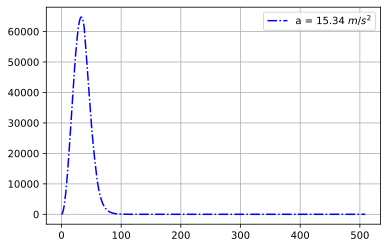

In [9]:
plt.plot(time,dynamic_pressure,'b-.',label=f'a = {acceleration:.2f} $m/s^{2}$')
plt.grid()
plt.legend();

In [10]:
max_q = max(dynamic_pressure)
index = dynamic_pressure.index(max_q)

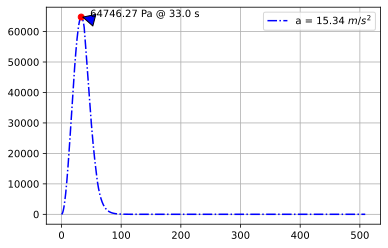

In [11]:
plt.plot(time,dynamic_pressure,'b-.',label=f'a = {acceleration:.2f} $m/s^{2}$')
plt.grid()
plt.legend()

# Annotating an arrow and text with max_q
plt.annotate(f'{max_q:.2f} Pa @ {time[index]} s', xy=(time[index]+2,max_q),
             xytext=(time[index]+15,max_q+15),arrowprops=dict(facecolor='blue',shrink=0.05))

# Plot the point of MaxQ
plt.plot(time[index],max_q,'ro');

**It looks like our arrow got squished. We can rerun the program with something like np.arange(0.0,150.0,0.5) or we can limit the time axis. Let's re-run the program with a small timestep**.

In [12]:
q1 = []
t1 = np.arange(0.0,150.0,0.5)

In [13]:
for t in t1:
    """
    Assuming acceleration to be constant,
    the rocket accelerates from 0 m/s to 7825 m/s
    in around 8.5 minutes = 510 seconds
    """
    acceleration1 = 7825/510
    altitude = compute_altitude(0, acceleration1, t)
    q = 0.5*compute_density(altitude)*compute_velocity(0,acceleration1,t)**2.0
    q1.append(q)

In [14]:
g_force = acceleration1/9.81
print(f"Total g force : {g_force + 1} g")

Total g force : 2.564030301213248 g


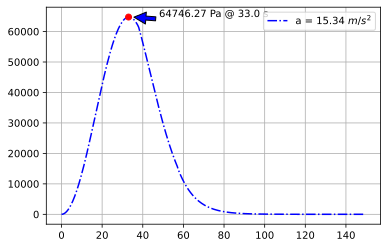

In [15]:
max_q1 = max(q1)
index1 = q1.index(max_q1)

plt.plot(t1,q1,'b-.',label=f'a = {acceleration1:.2f} $m/s^{2}$')
plt.grid()
plt.legend()

# Annotating an arrow and text with max_q
plt.annotate(f'{max_q1:.2f} Pa @ {t1[index1]} s', xy=(t1[index1]+2,max_q1),
             xytext=(t1[index1]+15,max_q1+15),arrowprops=dict(facecolor='blue',shrink=0.05))

# Plot the point of MaxQ
plt.plot(t1[index1],max_q1,'ro');

### Let's run the above code for different values of acceleration during launch

#### acceleration = 9.8 $m/s^{2}$ (1g)

In [16]:
q2 = []
t2 = np.arange(0.0,150.0,0.5)

In [17]:
for t in t2:
    """
    Assuming acceleration to be constant,
    a = 9.8 m/s^{2} (1g)
    """
    acceleration2 = 9.8
    altitude = compute_altitude(0, acceleration2, t)
    q = 0.5*compute_density(altitude)*compute_velocity(0,acceleration2,t)**2.0
    q2.append(q)

In [18]:
g_force = acceleration2/9.81
print(f"Total g force : {g_force + 1} g")

Total g force : 1.9989806320081551 g


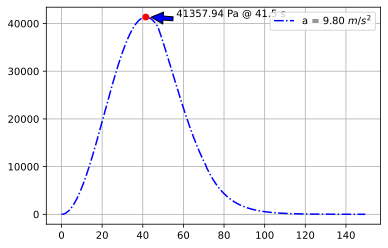

In [19]:
max_q2 = max(q2)
index2 = q2.index(max_q2)

plt.plot(t2,q2,'b-.',label=f'a = {acceleration2:.2f} $m/s^{2}$')
plt.grid()
plt.legend()

# Annotating an arrow and text with max_q
plt.annotate(f'{max_q2:.2f} Pa @ {t2[index2]} s', xy=(t2[index2]+2,max_q2),
             xytext=(t2[index2]+15,max_q2+15),arrowprops=dict(facecolor='blue',shrink=0.05))

# Plot the point of MaxQ
plt.plot(t2[index2],max_q2,'ro');

#### acceleration = 3.75 $m/s^{2}$

**Reference https://www.wired.com/2016/01/how-fast-did-blue-origins-rocket-accelerate-on-launch/**

In [20]:
q3 = []
t3 = np.arange(0.0,150.0,0.5)

In [21]:
for t in t3:
    """
    Assuming acceleration to be constant,
    a = 3.75 m/s^{2} (1g)
    """
    acceleration3 = 3.75
    altitude = compute_altitude(0, acceleration3, t)
    q = 0.5*compute_density(altitude)*compute_velocity(0,acceleration3,t)**2.0
    q3.append(q)

In [22]:
g_force = acceleration3/9.81
print(f"Total g force : {g_force + 1} g")

Total g force : 1.382262996941896 g


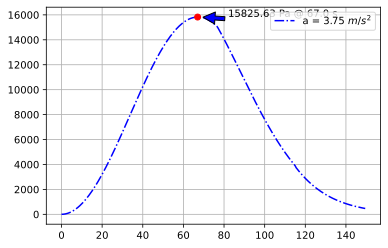

In [23]:
max_q3 = max(q3)
index3 = q3.index(max_q3)

plt.plot(t3,q3,'b-.',label=f'a = {acceleration3:.2f} $m/s^{2}$')
plt.grid()
plt.legend()

# Annotating an arrow and text with max_q
plt.annotate(f'{max_q3:.2f} Pa @ {t3[index3]} s', xy=(t3[index3]+2,max_q3),
             xytext=(t3[index3]+15,max_q3+15),arrowprops=dict(facecolor='blue',shrink=0.05))

# Plot the point of MaxQ
plt.plot(t3[index3],max_q3,'ro');

### Plots for different accelerations

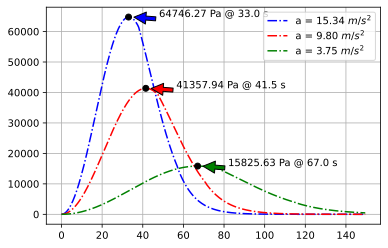

In [24]:
plt.plot(t1,q1,'b-.',label=f'a = {acceleration1:.2f} $m/s^{2}$')
plt.plot(t2,q2,'r-.',label=f'a = {acceleration2:.2f} $m/s^{2}$')
plt.plot(t3,q3,'g-.',label=f'a = {acceleration3:.2f} $m/s^{2}$')
plt.grid()
plt.legend()

# Annotating an arrow and text with max_q
plt.annotate(f'{max_q1:.2f} Pa @ {t1[index1]} s', xy=(t1[index1]+2,max_q1),
             xytext=(t1[index1]+15,max_q1+15),arrowprops=dict(facecolor='blue',shrink=0.05))
plt.annotate(f'{max_q2:.2f} Pa @ {t2[index2]} s', xy=(t2[index2]+2,max_q2),
             xytext=(t2[index2]+15,max_q2+15),arrowprops=dict(facecolor='red',shrink=0.05))
plt.annotate(f'{max_q3:.2f} Pa @ {t3[index3]} s', xy=(t3[index3]+2,max_q3),
             xytext=(t3[index3]+15,max_q3+15),arrowprops=dict(facecolor='green',shrink=0.05))

# Plot the point of MaxQ
plt.plot(t1[index1],max_q1,'ko')
plt.plot(t2[index2],max_q2,'ko')
plt.plot(t3[index3],max_q3,'ko')

**The takeaway here is that changing the launch average acceleration can have dramatic effects on the maximum pressure experienced by the launch vehicle.**